# Esercizio 6

Per calcolare quanto fare lunghi i blocchi, ho calcolato la funzione di autocorrelazione alla temperatura T=0.5 e ho notato che dopo circa 10000 passi l'autocorrelazione della magnetizzazione (che era l'osservabile che richiedeva più passi) era circa 0, così le simulazioni seguenti le ho avviate con blocchi da 20000 passi in modo da avere i valori delle medie dei blocchi scorrelati e poter applicare il teorema del limite centrale assumendo i valori indipendenti. Successivamente per capire quanto dovevo aspettare per far raggiungere l'equilibrio al sistema ho fatto partire la simulazione per 1000 blocchi da 20000 passi, alla temperatura T=0.5 e ho notato che l'equilibrio veniva raggiunto dopo 200 blocchi, ovvero 4 milioni di passi, quindi per le simulazioni successive ho fatto "muovere" l'algoritmo di metropolis per 4 milioni passi prima di calcolare le medie e gli errori. Queste prime simulazioni le ho fatte alla temperatura di T=0.5 perchè è quella che richiede più "tempo" per arrivare all'equilibrio e per avere medie scorrelate, dato che la probabilità di cambiare configurazione è più bassa per temperature basse.

In [274]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

restart, nspin, J, h, metro, nblk, nstep, T_min, T_max, n_points, nblk_equilibrium, autocor_on = np.loadtxt("./input.dat")
 
T = np.linspace(T_min, T_max, int(n_points))

beta = 1/T
Ns = nspin
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

###########
#valori teorici
e = -J*( th + ch*thN )/( 1 + thN )#scritta dal prof
#e = -J*( th + (ch**2)*thN )/( 1 + thN ) #qua forse c'era un errore
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

b=beta
#h=0.02 #external field
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

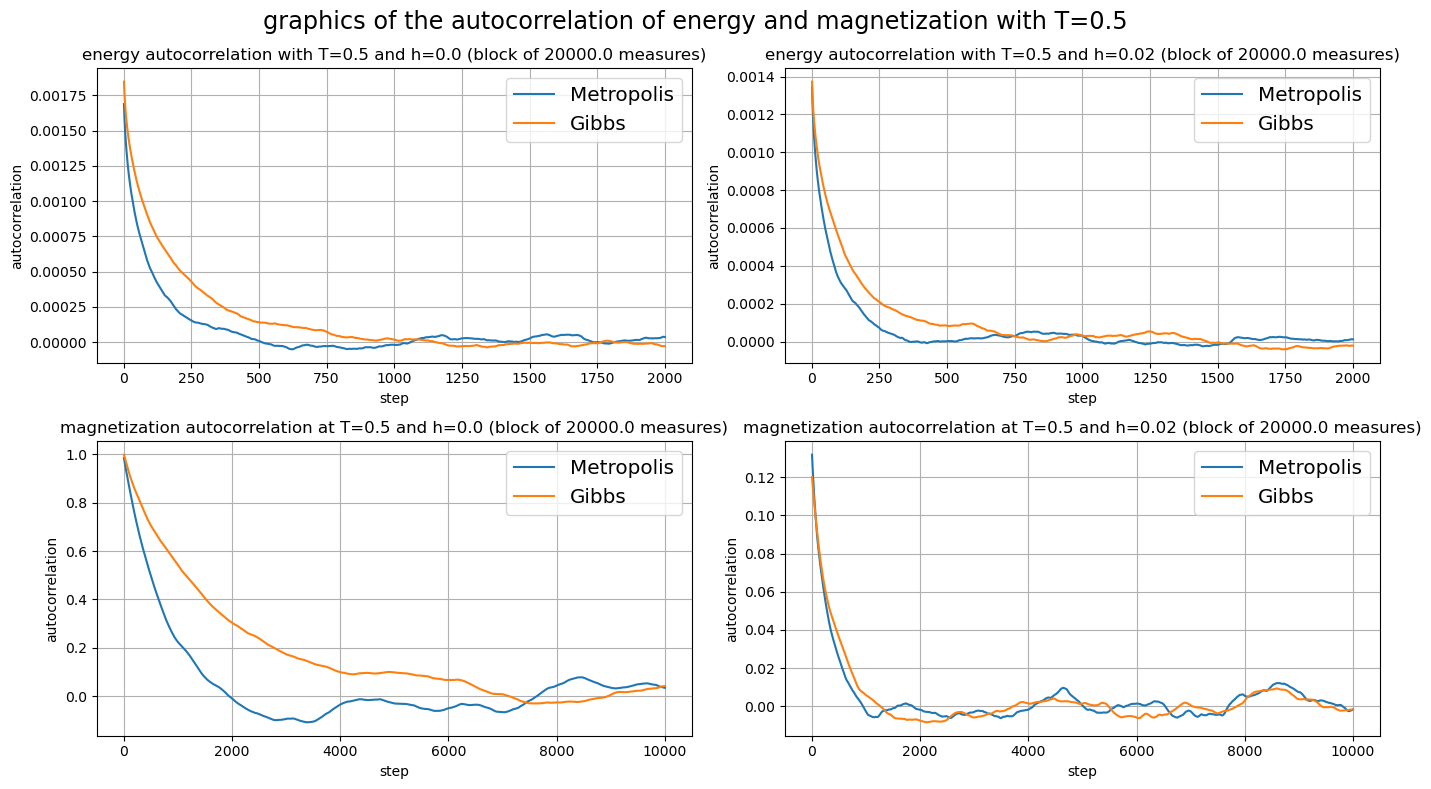

In [275]:
############ grafici autocorrelazione T=0.5 #############

fig1, axs = plt.subplots(2, 2, tight_layout = True, figsize=(14,8))

U_metro_autocor_T_min_h_0 = np.loadtxt("./values_per_block/energy_metro_autocorrelation_T_0.500000(h=0.000000).txt")                     
U_gibbs_autocor_T_min_h_0 = np.loadtxt("./values_per_block/energy_gibbs_autocorrelation_T_0.500000(h=0.000000).txt")
U_metro_autocor_T_min_h_002 = np.loadtxt("./values_per_block/energy_metro_autocorrelation_T_0.500000(h=0.020000).txt")
U_gibbs_autocor_T_min_h_002 = np.loadtxt("./values_per_block/energy_gibbs_autocorrelation_T_0.500000(h=0.020000).txt")

Mag_metro_autocor_T_min_h_0 = np.loadtxt("./values_per_block/magnetization_metro_autocorrelation_T_0.500000(h=0.000000).txt")
Mag_gibbs_autocor_T_min_h_0 = np.loadtxt("./values_per_block/magnetization_gibbs_autocorrelation_T_0.500000(h=0.000000).txt")
Mag_metro_autocor_T_min_h_002 = np.loadtxt("./values_per_block/magnetization_metro_autocorrelation_T_0.500000(h=0.020000).txt")
Mag_gibbs_autocor_T_min_h_002 = np.loadtxt("./values_per_block/magnetization_gibbs_autocorrelation_T_0.500000(h=0.020000).txt")

axs[0,0].plot(U_metro_autocor_T_min_h_0[:2000,0], U_metro_autocor_T_min_h_0[:2000,1], label='Metropolis')
axs[0,0].plot(U_gibbs_autocor_T_min_h_0[:2000,0], U_gibbs_autocor_T_min_h_0[:2000,1], label='Gibbs')
axs[0,0].set_title("energy autocorrelation with T=" + str(T_min) + " and h=0.0 (block of " + str(nstep_T_min) + " measures)")

axs[0,1].plot(U_metro_autocor_T_min_h_002[:2000,0], U_metro_autocor_T_min_h_002[:2000,1], label='Metropolis')
axs[0,1].plot(U_gibbs_autocor_T_min_h_002[:2000,0], U_gibbs_autocor_T_min_h_002[:2000,1], label='Gibbs')
axs[0,1].set_title("energy autocorrelation with T=" + str(T_min) + " and h=0.02 (block of " + str(nstep_T_min) + " measures)")

axs[1,0].plot(Mag_metro_autocor_T_min_h_0[:10000,0], Mag_metro_autocor_T_min_h_0[:10000,1], label='Metropolis')
axs[1,0].plot(Mag_gibbs_autocor_T_min_h_0[:10000,0], Mag_gibbs_autocor_T_min_h_0[:10000,1], label='Gibbs')
axs[1,0].set_title("magnetization autocorrelation at T=" + str(T_min) + " and h=0.0 (block of " + str(nstep_T_min) + " measures)")

axs[1,1].plot(Mag_metro_autocor_T_min_h_002[:10000,0], Mag_metro_autocor_T_min_h_002[:10000,1], label='Metropolis')
axs[1,1].plot(Mag_gibbs_autocor_T_min_h_002[:10000,0], Mag_gibbs_autocor_T_min_h_002[:10000,1], label='Gibbs')
axs[1,1].set_title("magnetization autocorrelation at T=" + str(T_min) + " and h=0.02 (block of " + str(nstep_T_min) + " measures)")      
        
for i in range(2):
    
    for j in range(2):
        axs[i,j].set_ylabel('autocorrelation')
        axs[i,j].legend(fontsize='x-large')
        axs[i,j].set_xlabel('step')
        axs[i,j].grid(True)       
        
plt.suptitle("graphics of the autocorrelation of energy and magnetization with T=" + str(T_min), size='xx-large')
plt.show()

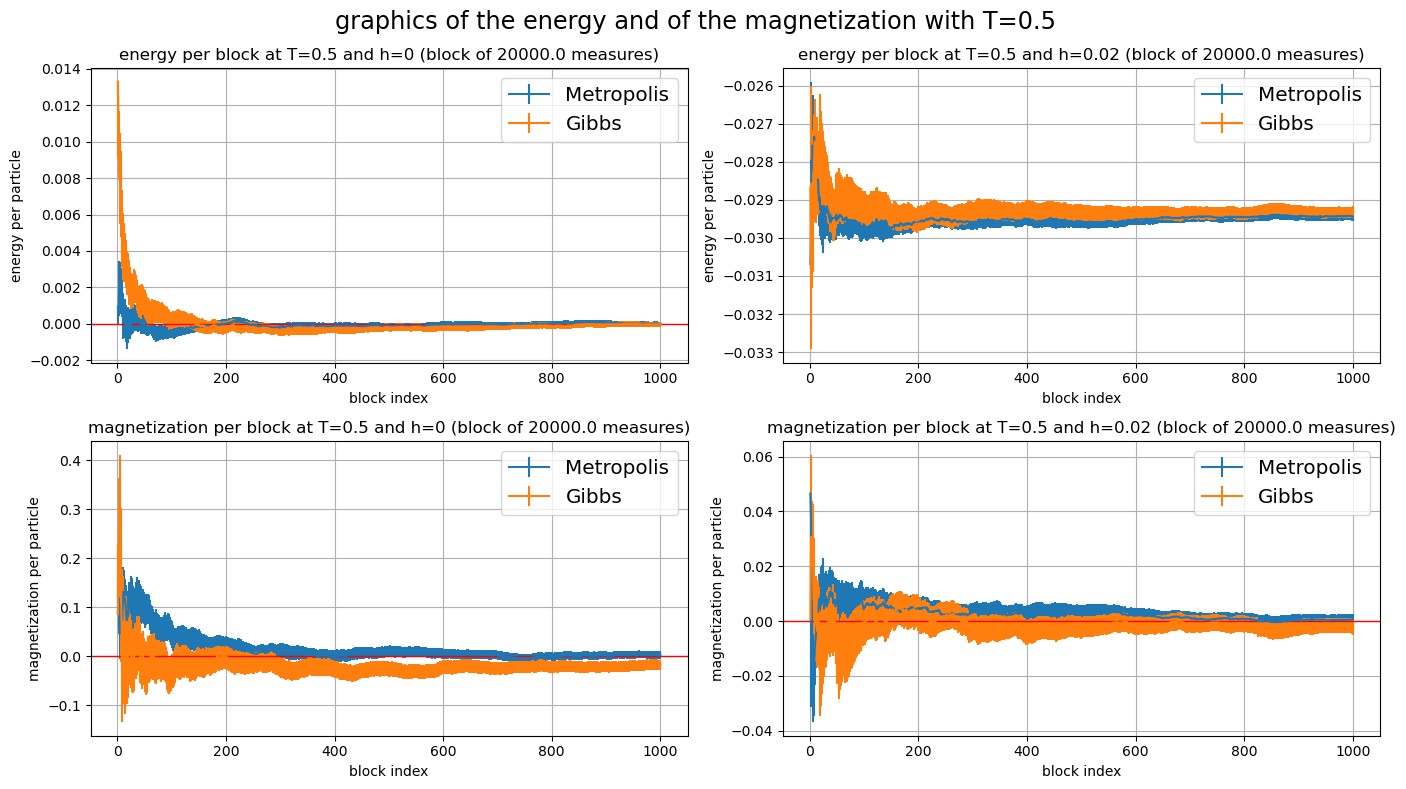

In [276]:
######## grafici per blocchi T=0.5 ########

fig1, axs = plt.subplots(2, 2, tight_layout = True, figsize=(14,8))

U_metro_T_min_h_0 = np.loadtxt("./values_per_block/energy_metro_T_0.500000(h=0.000000).txt")
U_gibbs_T_min_h_0 = np.loadtxt("./values_per_block/energy_gibbs_T_0.500000(h=0.000000).txt")
U_metro_T_min_h_002 = np.loadtxt("./values_per_block/energy_metro_T_0.500000(h=0.020000).txt")
U_gibbs_T_min_h_002 = np.loadtxt("./values_per_block/energy_gibbs_T_0.500000(h=0.020000).txt")

Mag_metro_T_min_h_0 = np.loadtxt("./values_per_block/magnetization_metro_T_0.500000(h=0.000000).txt")
Mag_gibbs_T_min_h_0 = np.loadtxt("./values_per_block/magnetization_gibbs_T_0.500000(h=0.000000).txt")
Mag_metro_T_min_h_002 = np.loadtxt("./values_per_block/magnetization_metro_T_0.500000(h=0.020000).txt")
Mag_gibbs_T_min_h_002 = np.loadtxt("./values_per_block/magnetization_gibbs_T_0.500000(h=0.020000).txt")

nstep_T_min = U_metro_T_min_h_0[0,2]
x_blk = np.arange(1, len(U_metro_T_min_h_0) )

axs[0,0].errorbar(x_blk[:], U_metro_T_min_h_0[1:,2] - e[0], yerr = U_metro_T_min_h_0[1:,3], label='Metropolis')
axs[0,0].errorbar(x_blk[:], U_gibbs_T_min_h_0[1:,2] - e[0], yerr = U_gibbs_T_min_h_0[1:,3], label='Gibbs')
axs[0,0].set_title("energy per block at T=0.5 and h=0 (block of " + str(nstep_T_min) + " measures)")
axs[0,0].axhline(0, c='red', lw=1, ls='solid')

axs[0,1].errorbar(x_blk[:], U_metro_T_min_h_002[1:,2] - e[0], yerr = U_metro_T_min_h_002[1:,3], label='Metropolis')
axs[0,1].errorbar(x_blk[:], U_gibbs_T_min_h_002[1:,2] - e[0], yerr = U_gibbs_T_min_h_002[1:,3], label='Gibbs')
axs[0,1].set_title("energy per block at T=0.5 and h=0.02 (block of " + str(nstep_T_min) + " measures)")

axs[1,0].errorbar(x_blk[:], Mag_metro_T_min_h_0[1:,2], yerr = Mag_metro_T_min_h_0[1:,3], label='Metropolis')
axs[1,0].errorbar(x_blk[:], Mag_gibbs_T_min_h_0[1:,2], yerr = Mag_gibbs_T_min_h_0[1:,3], label='Gibbs')
axs[1,0].set_title("magnetization per block at T=0.5 and h=0 (block of " + str(nstep_T_min) + " measures)")

axs[1,1].errorbar(x_blk[:], Mag_metro_T_min_h_002[1:,2] - M[0], yerr = Mag_metro_T_min_h_002[1:,3], label='Metropolis')
axs[1,1].errorbar(x_blk[:], Mag_gibbs_T_min_h_002[1:,2] - M[0], yerr = Mag_gibbs_T_min_h_002[1:,3], label='Gibbs')
axs[1,1].set_title("magnetization per block at T=0.5 and h=0.02 (block of " + str(nstep_T_min) + " measures)")

for i in range(2):
    axs[0,i].set_ylabel('energy per particle')
    axs[1,i].set_ylabel('magnetization per particle')
    axs[1,i].axhline(0, c='red', lw=1, ls='solid')
    
    for j in range(2):
        axs[i,j].set_xlabel('block index')
        axs[i,j].legend(fontsize='x-large')
        axs[i,j].grid(True)       
        
plt.suptitle("graphics of the energy and of the magnetization with T=" + str(T_min), size='xx-large')
plt.show()

Una volta calcolati il numero di passi necessari per l'equilibrazione e il numero di passi necessari per avere i blocchi scorrelati, ho avviato la simulazione per 20 blocchi da 20000 passi per 100 temperature diverse comprese tra T=0.5 e T=2.0 usando l'algoritmo di Metropolis e quello di Gibbs e qua ho graficato le quantità di interesse. Per l'algoritmo di Metropolis ho usato come probabilità di accettazione:
$ p = exp(-\beta\Delta E) $ dove $\Delta E = 2Js_k( s_{k-1} + s_{k+1} ) + 2hs_k $
Per l'algoritmo di Gibbs invece ho usato come probabilità di transizione:
$ p = 1 / ( 1 + exp( -2\beta s'_k J( s_{k-1} + s_{+1} ) + 2\beta h ) ) $

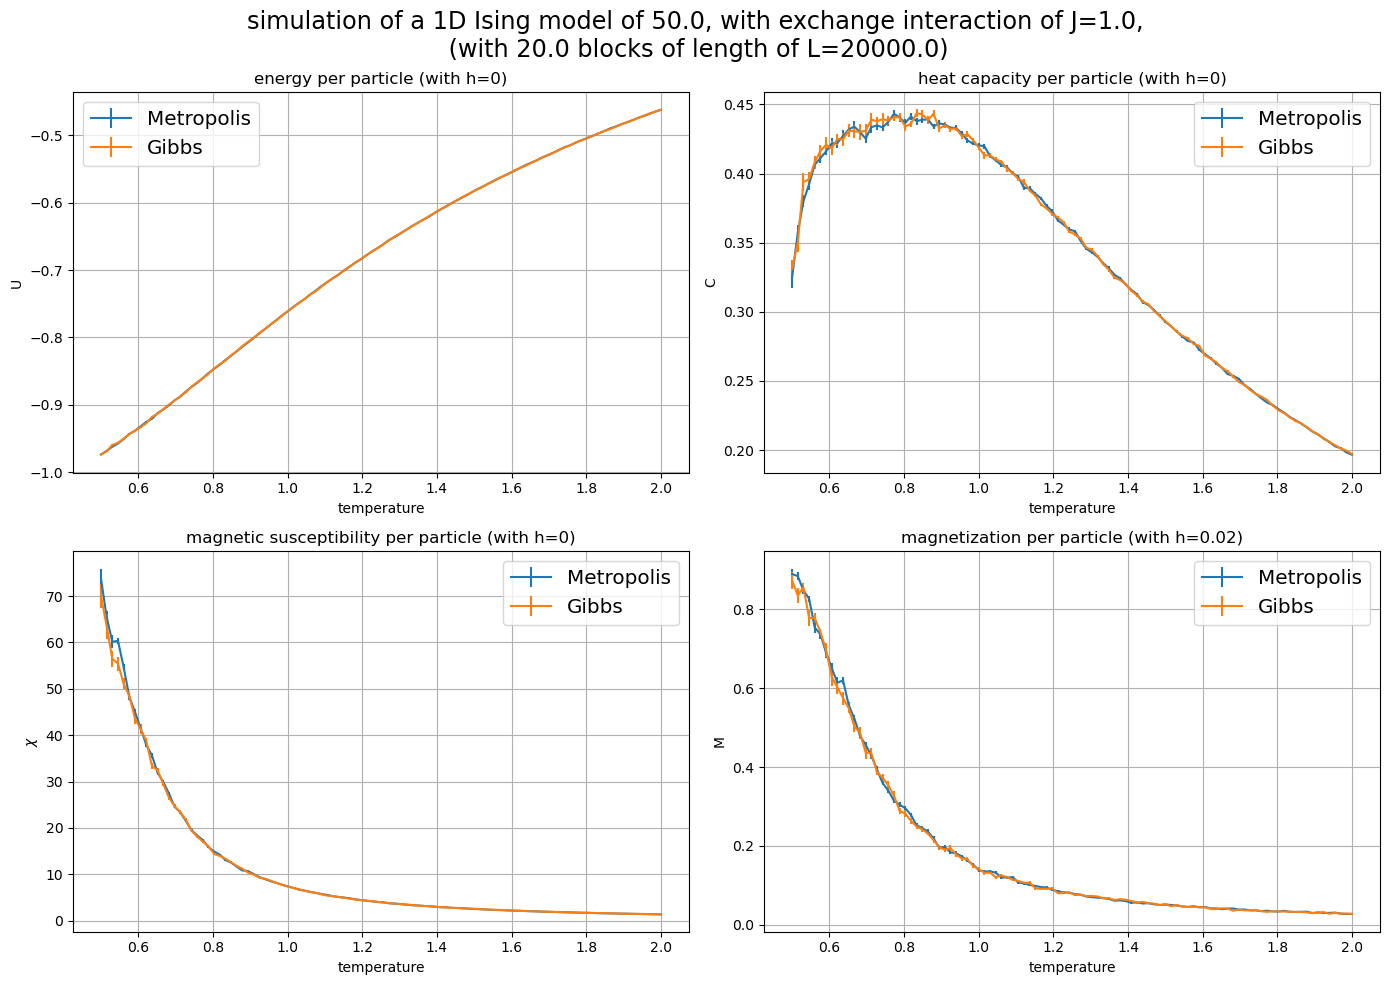

In [279]:
iu_m = 0
ic_m = 1
ix_m = 2
im_m = 3
iu_g = 4
ic_g = 5
ix_g = 6
im_g = 7

data = np.zeros((8, int(n_points), 3)) #array di 8 righe, ciascuna con n_points colonne e ciascuna colonna con 3 elementi

data[iu_m] = np.loadtxt("./energy_metro(h=0.000000).txt")
data[ic_m] = np.loadtxt("./heat_capacity_metro(h=0.000000).txt")
data[ix_m] = np.loadtxt("./magnetic_susceptibility_metro(h=0.000000).txt")
data[im_m] = np.loadtxt("./magnetization_metro(h=0.020000).txt")
data[iu_g] = np.loadtxt("./energy_gibbs(h=0.000000).txt")
data[ic_g] = np.loadtxt("./heat_capacity_gibbs(h=0.000000).txt")
data[ix_g] = np.loadtxt("./magnetic_susceptibility_gibbs(h=0.000000).txt")
data[im_g] = np.loadtxt("./magnetization_gibbs(h=0.020000).txt")

#order data from T_min to T_max
for i in range(8):
    data[i] = data[i][::-1]

fig2, axs2 = plt.subplots(2, 2, tight_layout = True, figsize=(14,10))

axs2[0,0].errorbar(T, data[iu_m,:,1], yerr = data[iu_m,:,2], label='Metropolis')#-e[:]
axs2[0,0].errorbar(T, data[iu_g,:,1], yerr = data[iu_g,:,2], label='Gibbs')

axs2[0,1].errorbar(T, data[ic_m,:,1], yerr = data[ic_m,:,2], label='Metropolis')#-heat[:]
axs2[0,1].errorbar(T, data[ic_g,:,1], yerr = data[ic_g,:,2], label='Gibbs')

axs2[1,0].errorbar(T[:], data[ix_m,:,1], yerr = data[ix_m,:,2], label='Metropolis')#-X[:]
axs2[1,0].errorbar(T[:], data[ix_g,:,1], yerr = data[ix_g,:,2], label='Gibbs')

axs2[1,1].errorbar(T[:], data[im_m,:,1], yerr = data[im_m,:,2], label='Metropolis')#-M[:]
axs2[1,1].errorbar(T[:], data[im_g,:,1], yerr = data[im_g,:,2], label='Gibbs')

axs2[0,0].set_title("energy per particle (with h=0)")
axs2[0,1].set_title("heat capacity per particle (with h=0)")
axs2[1,0].set_title("magnetic susceptibility per particle (with h=0)")
axs2[1,1].set_title("magnetization per particle (with h=" + str(h) + ")")

axs2[0,0].set_ylabel('U')
axs2[0,1].set_ylabel('C')
axs2[1,0].set_ylabel(r'$\chi$')
axs2[1,1].set_ylabel('M')

for i in range(0, 2):
    for j in range(2):
        axs2[i,j].grid(True)
        axs2[i,j].legend(fontsize='x-large')
        axs2[i,j].set_xlabel('temperature')
        #axs[i,j].axhline(0, c='red', lw=1, ls='solid')

plt.suptitle("simulation of a 1D Ising model of " + str(nspin) + ", with exchange interaction of J=" + str(J) + ",\n (with " + str(nblk) + " blocks of length of L=" + str(nstep) + ")", size='xx-large')
plt.show()